In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

import sklearn
import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *
import umap_utils
reload(umap_utils)
from umap_utils import *

import warnings
warnings.filterwarnings('ignore')

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes
# Dimension reduction and clustering libraries
import umap
import umap.plot
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn import manifold
from plt_utils import generateAxesForMultiplePlots
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.family']='serif'

Normalize the maps and instead of simulations maybe use different maps? we can find something commmon across different maps?

## LtU Shy

The AUC score is 0.9733966270525063.
(3000, 2)


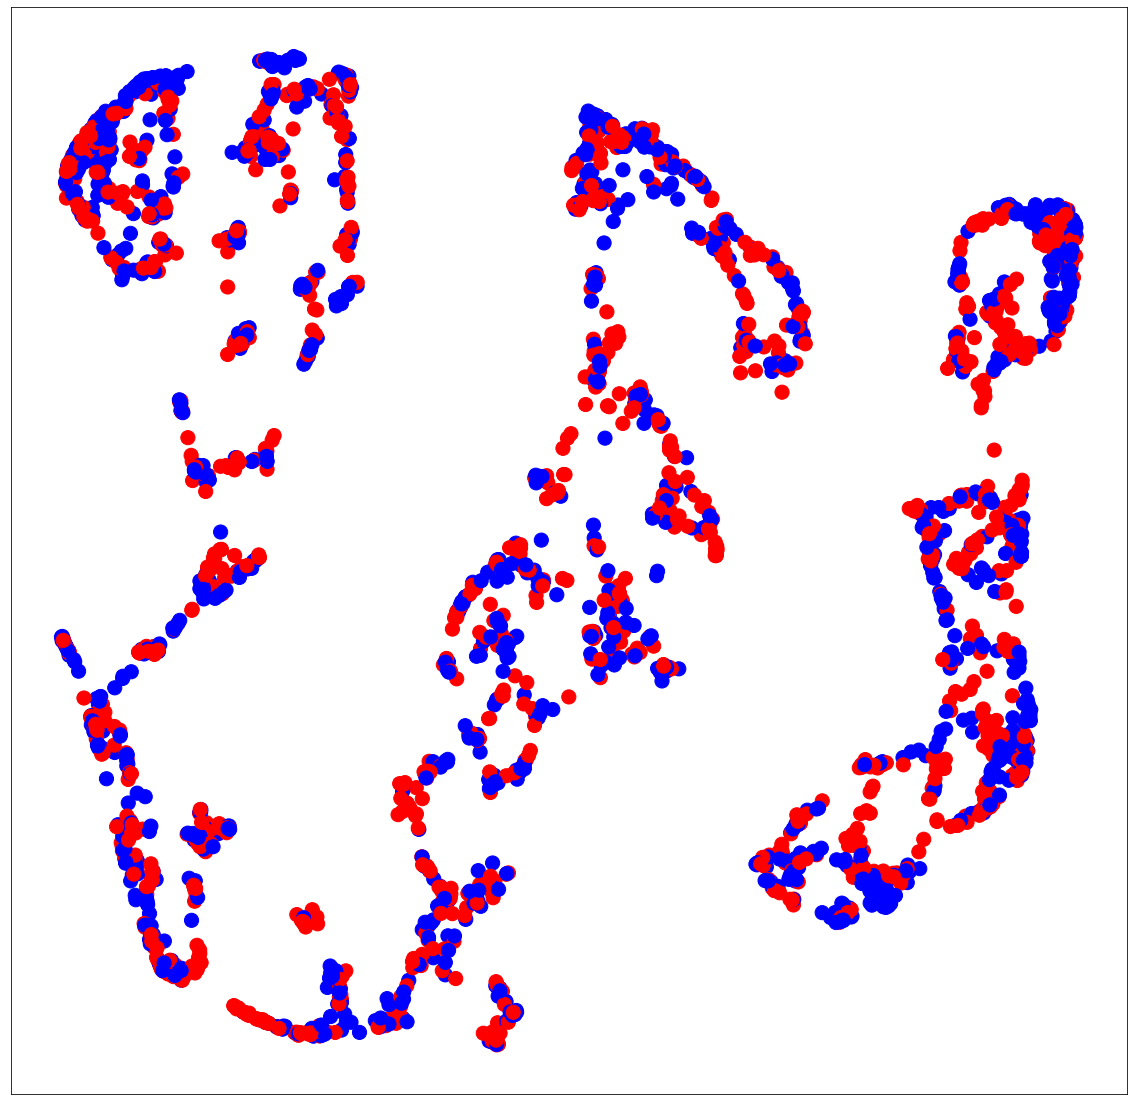

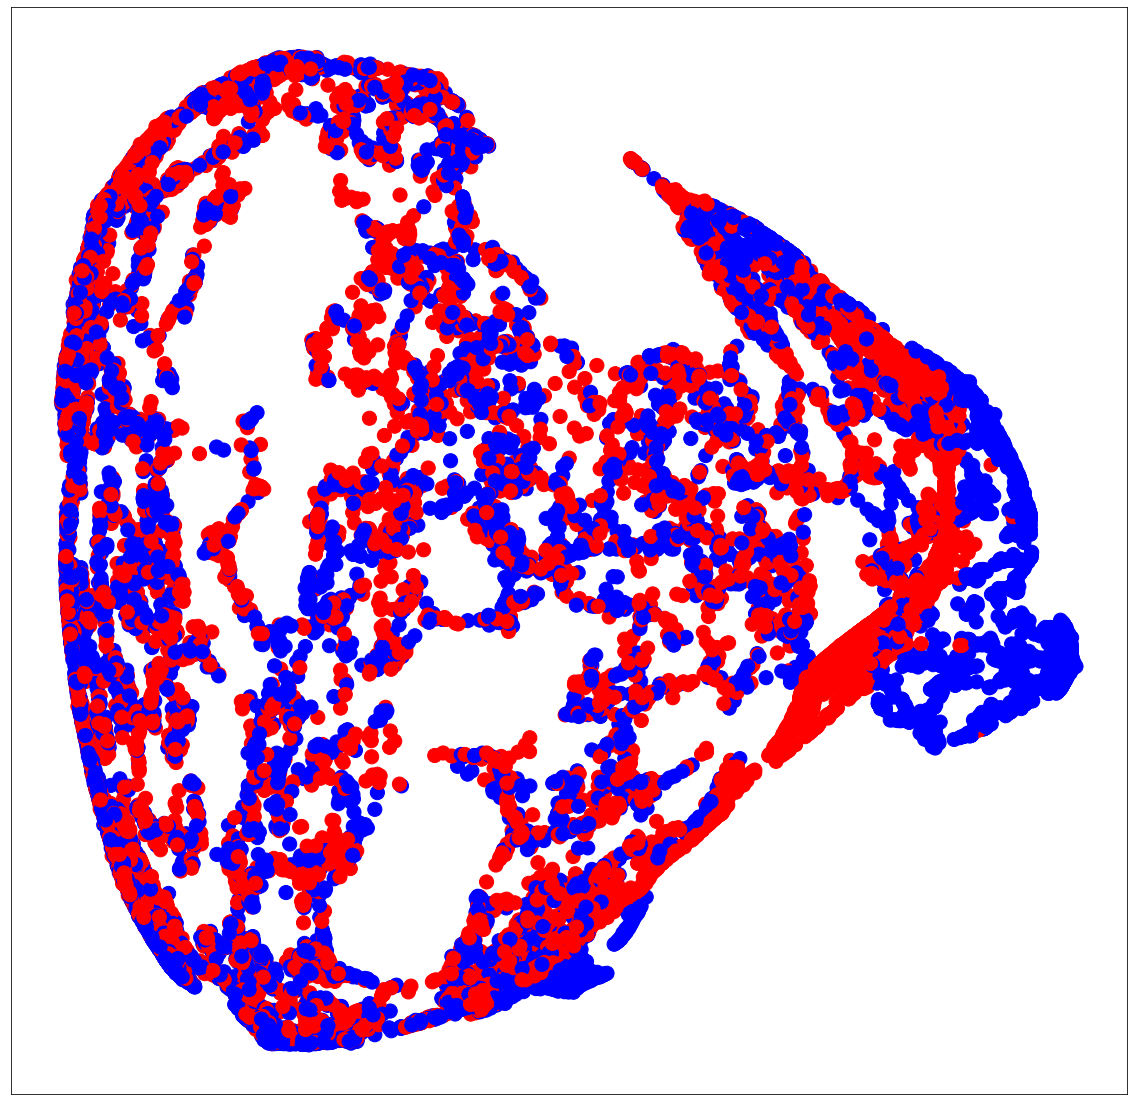

In [87]:
sim  = ['TNG', 'SIMBA']; field = 'HI'
study_name = "TNG_SIMBA_HI_cnn_enc_dec_zero_monopole_1"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
vib_umap = UMAP(sim=sim,field=field,study_name=study_name, fpath=fpath, ext_sim='ASTRID')
pred, label = vib_umap.plot_umap(n_neighbors=20,min_dist=0.01, n_components=3, ext_sim=False, connectivity=False, return_data=True)

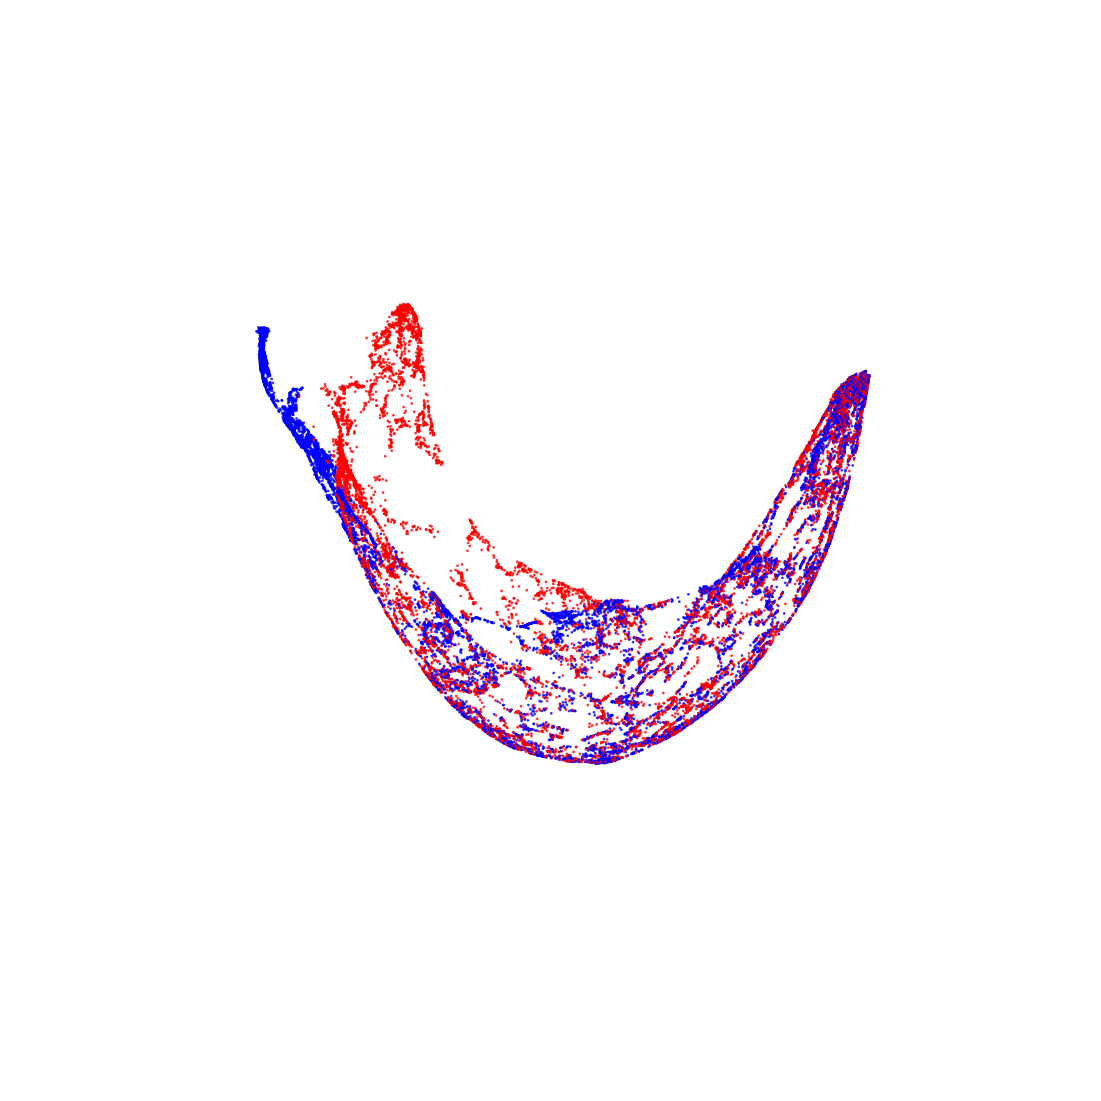

In [88]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x=pred[:,0]
y=pred[:,1]
z=pred[:,2]


ax.scatter(x, y, z, c=label, cmap='Spectral', marker='o',s=3,alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(180, 90)
plt.axis('off')
plt.show()

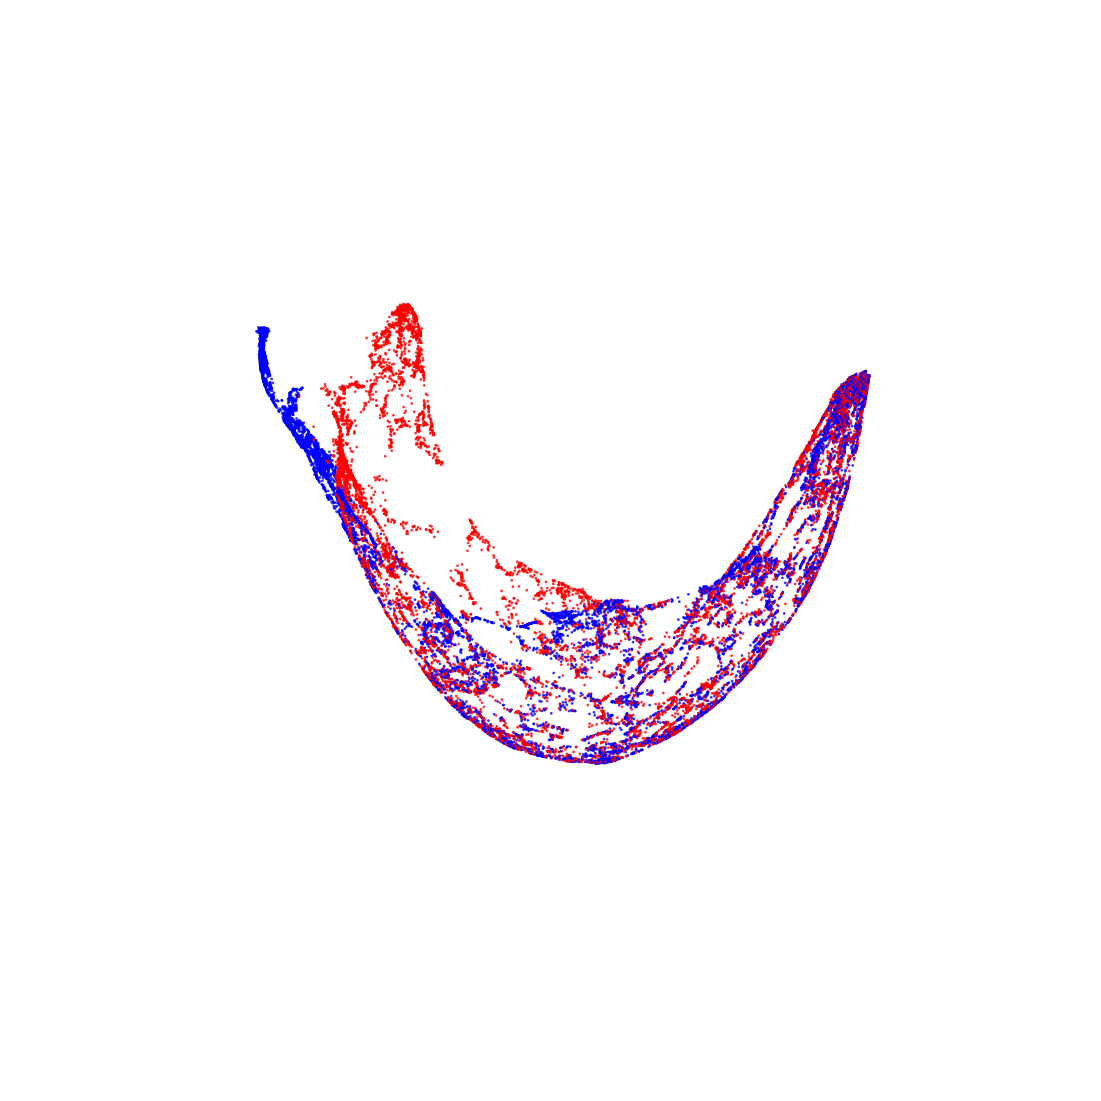

In [97]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x=pred[:,0]
y=pred[:,1]
z=pred[:,2]


ax.scatter(x, y, z, c=label, cmap='Spectral', marker='o',s=3,alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(180, 90)
plt.axis('off')
plt.show()
plt.close()

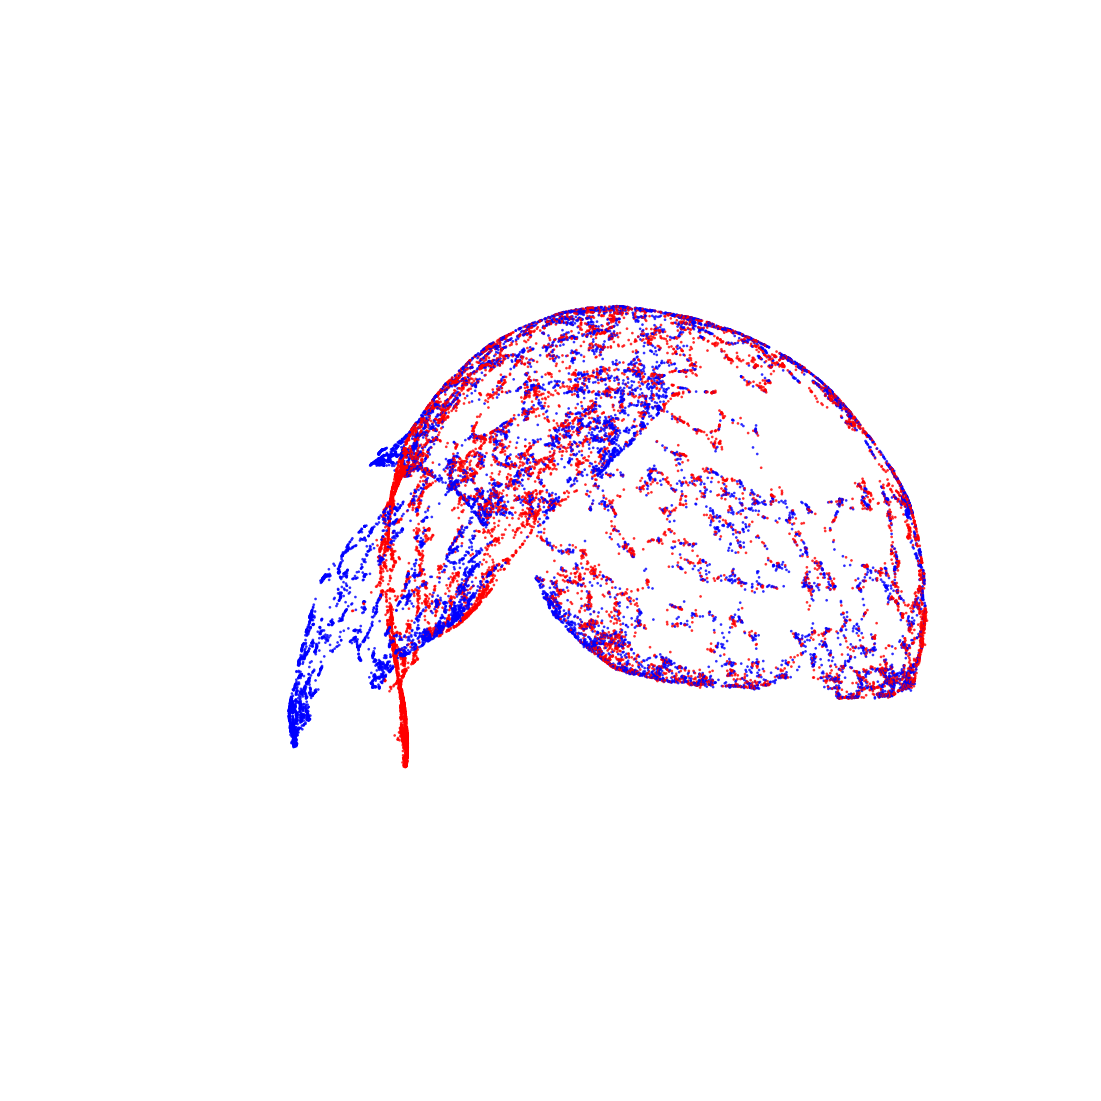

In [89]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x=pred[:,0]
y=pred[:,1]
z=pred[:,2]


ax.scatter(x, y, z, c=label, cmap='Spectral', marker='o',s=3,alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(0, 45)
plt.axis('off')
plt.show()
plt.close()

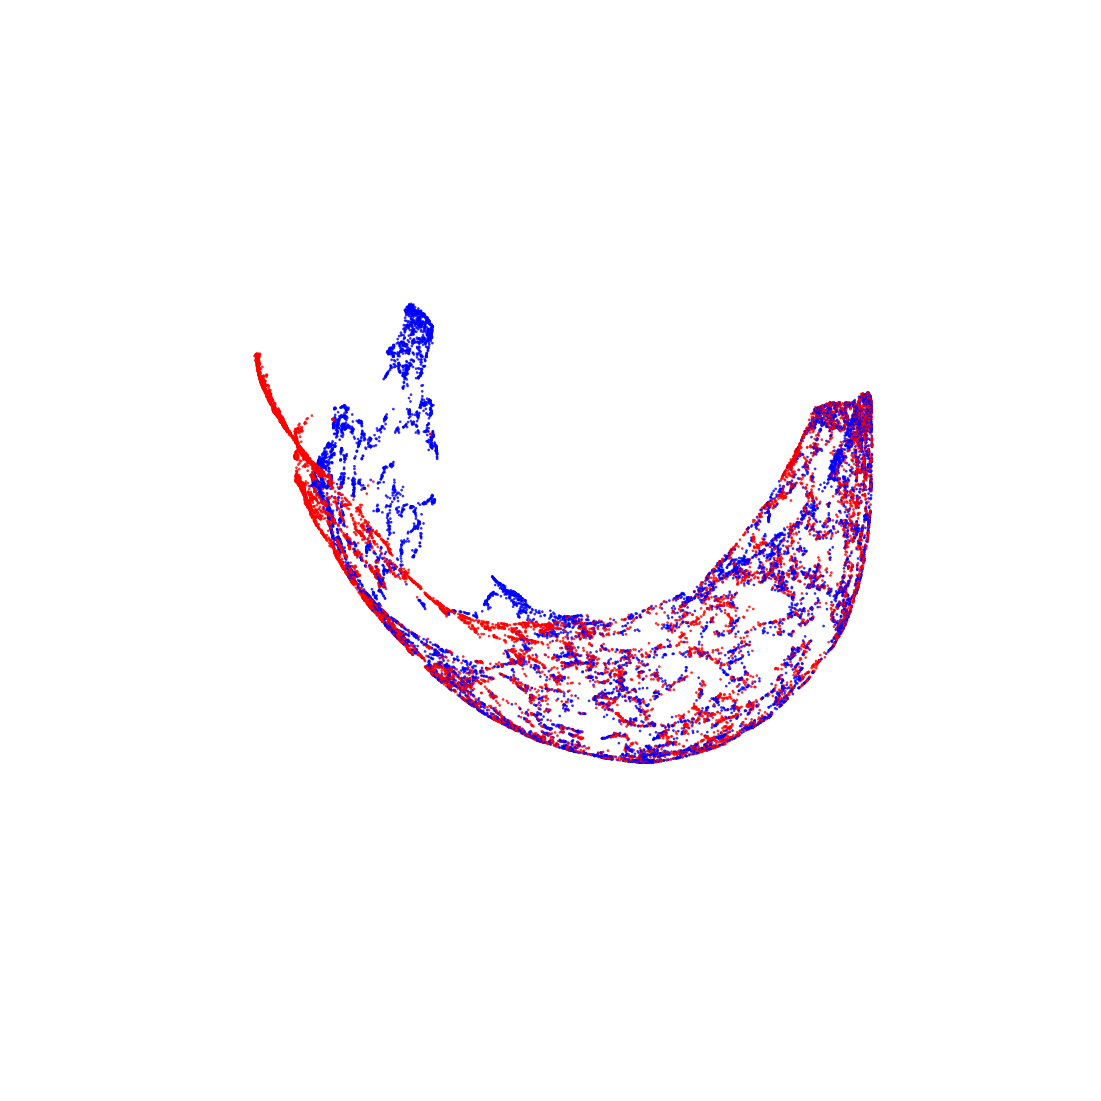

In [86]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x=pred[:,0]
y=pred[:,1]
z=pred[:,2]


ax.scatter(x, y, z, c=label, cmap='Spectral', marker='o',s=3,alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(180, 90)
plt.axis('off')
plt.show()

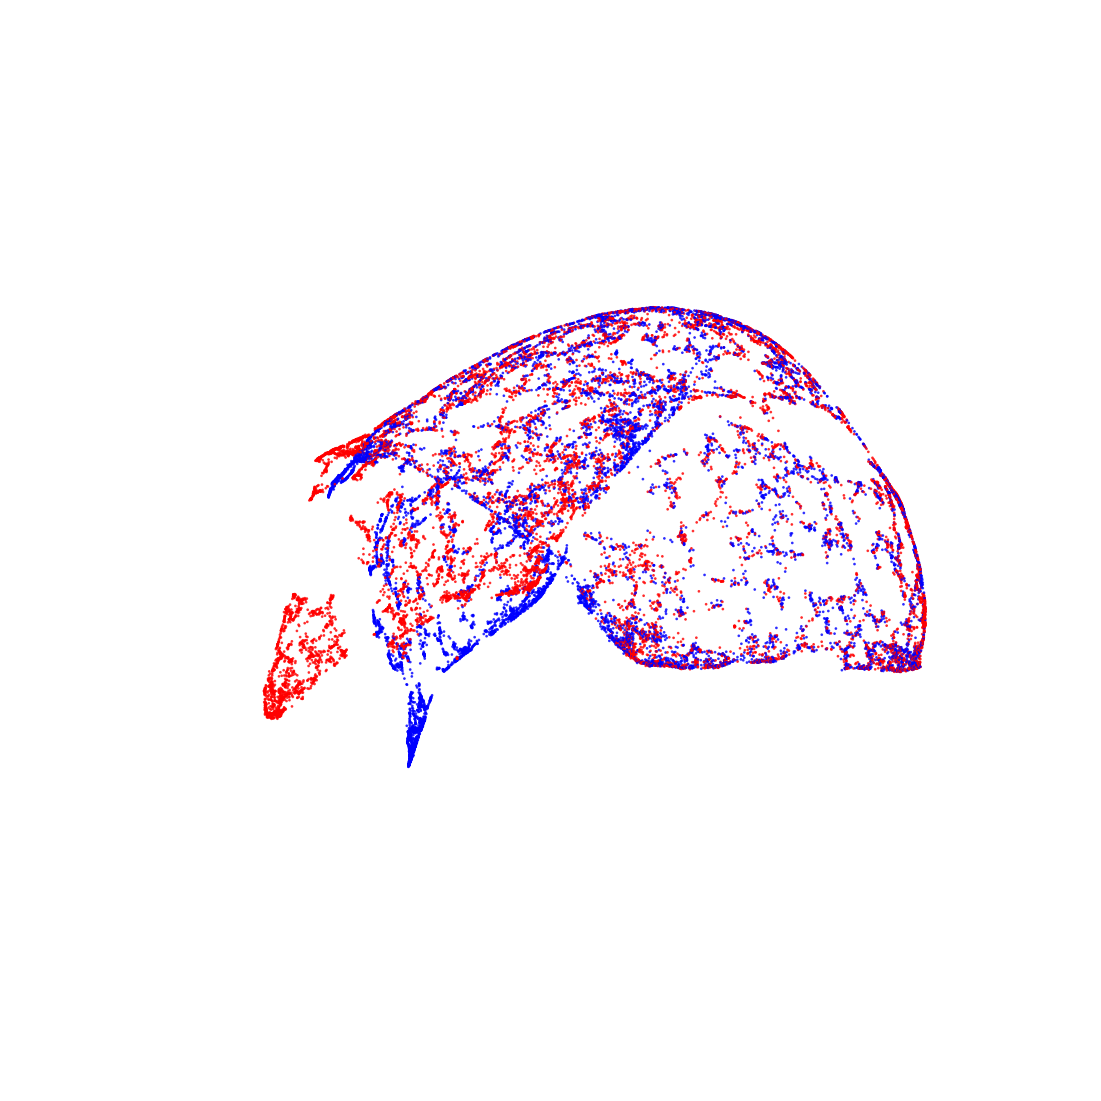

In [85]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x=pred[:,0]
y=pred[:,1]
z=pred[:,2]


ax.scatter(x, y, z, c=label, cmap='Spectral', marker='o',s=3,alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(0, 45)
plt.axis('off')
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(pred[:,2], pred[:,4], c=label, cmap='Spectral', s=2, alpha=0.7)

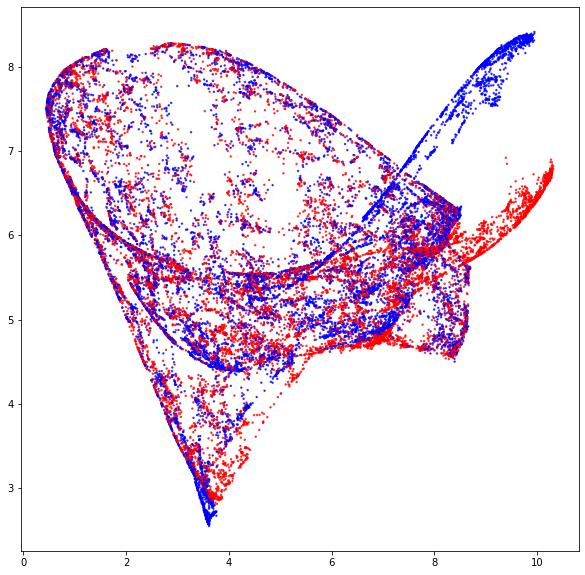

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(pred[:,2], pred[:,4], c=label, cmap='Spectral', s=2, alpha=0.7)

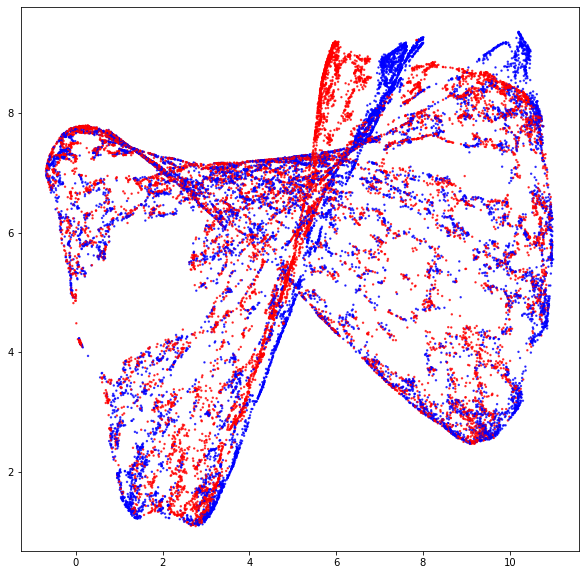

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(pred[:,1], pred[:,3], c=label, cmap='Spectral', s=2, alpha=0.7)

## SIMBA+ASTRID zero

In [167]:
sim  = ['SIMBA', 'ASTRID']; field = 'HI'
study_name = "SIMBA_ASTRID_HI_cnn_enc_dec_zero_monopole_1"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
vib_umap = UMAP(sim=sim,field=field,study_name=study_name, fpath=fpath, ext_sim='TNG')

The AUC score is 0.8292992851663683.
(3000, 2)


In [168]:
mapper, data, pred, label = vib_umap.return_umap(n_neighbors=100,min_dist=1, n_components=3, random_state=10,
                                                 ext_sim=False, which_data='train')
label = label[0]

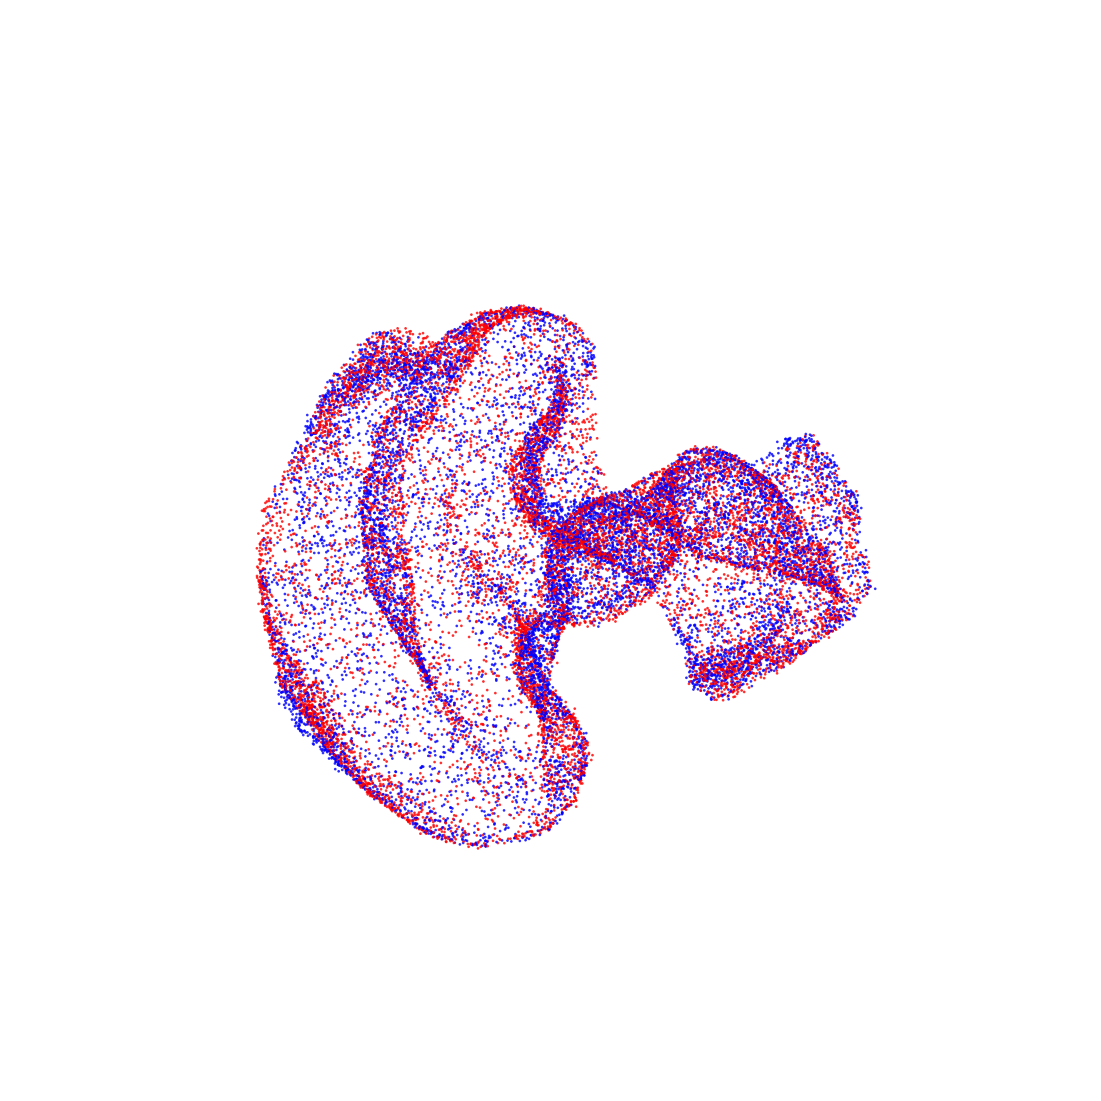

In [169]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x=pred[:,0]
y=pred[:,1]
z=pred[:,2]

ax.scatter(x, y, z, c=label, marker='o',s=3,alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30, 90)
plt.axis('off')
plt.show()
plt.close()

## TNG+ASTRID zero

In [3]:
embedding = umap.UMAP(n_neighbors=500,
                                     min_dist=0.01,
                                     n_components=2,
                                      random_state=0)


In [28]:
sim  = ['TNG', 'SIMBA']; field = 'HI'
#study_name = "TNG_SIMBA_HI_cnn_zero_monopole_1"
study_name = "TNG_SIMBA_HI_cnn_enc_dec_mid_monopole_1"
#study_name = "TNG_ASTRID_HI_cnn_zero_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
vib_umap = UMAP(sim=sim,field=field,study_name=study_name, fpath=fpath, ext_sim='ASTRID')

The AUC score is 0.4973585618836922.
(3000, 2)


In [35]:
data=vib_umap.Z_train
params = vib_umap.y_train_param

In [43]:
index         = np.logical_and(params[:,1]> 0.8,params[:,0]>0.3)
high_om       = data[index,:]
high_om_label = vib_umap.ylabel[index]
high_om_params = params[index,:]

In [37]:
high_om_r = high_om[vib_umap.ylabel[index]=='r']
high_om_b = high_om[vib_umap.ylabel[index]=='b']

In [7]:
mapper    = embedding.fit(high_om_r)
trans_data = embedding.transform(high_om)

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(params[:,0], params[:,1], c=vib_umap.ylabel)

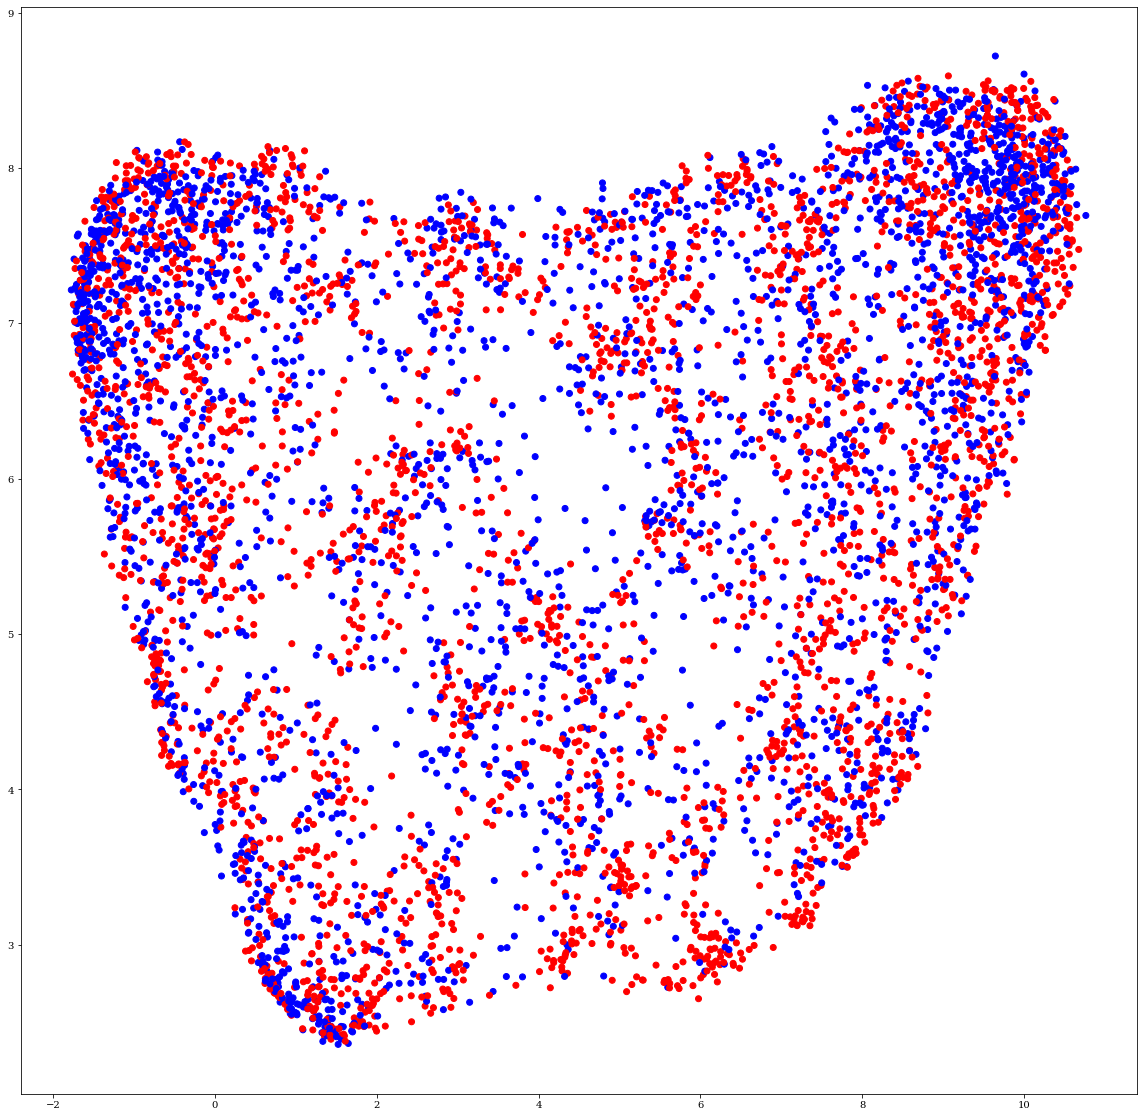

In [8]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,1], c=high_om_label)

In [154]:
plt.scatter(trans_data[:,1], trans_data[:,2], c=high_om_label)

IndexError: index 2 is out of bounds for axis 1 with size 2

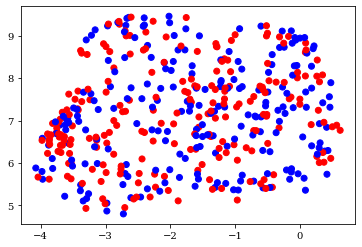

In [142]:
plt.scatter(trans_data[:,0], trans_data[:,2], c=high_om_label)

In [117]:
tsne = manifold.TSNE(n_components=3, random_state=0, perplexity=100, n_iter=250)
trans_data = tsne.fit_transform(high_om).T

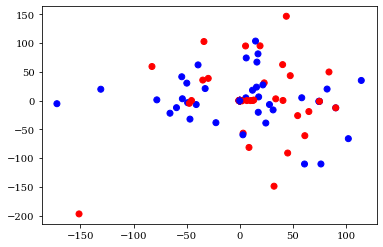

In [111]:
plt.scatter(trans_data[0], trans_data[1], c=high_om_label)

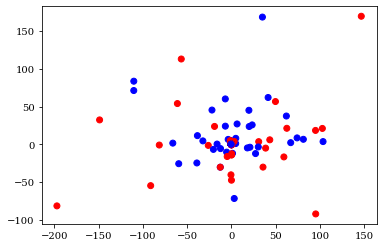

In [112]:
plt.scatter(trans_data[1], trans_data[2], c=high_om_label)

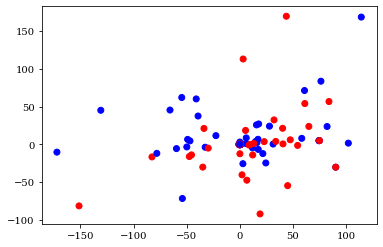

In [113]:
plt.scatter(trans_data[0], trans_data[2], c=high_om_label)

In [99]:
mds = manifold.MDS(3, max_iter=100, n_init=10,  random_state=42)
trans_data1 = mds.fit_transform(high_om).T

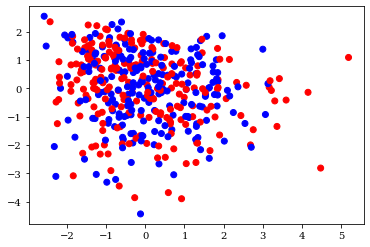

In [100]:
plt.scatter(trans_data1[0], trans_data1[1], c=high_om_label)

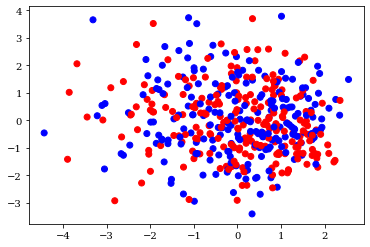

In [101]:
plt.scatter(trans_data1[1], trans_data1[2], c=high_om_label)

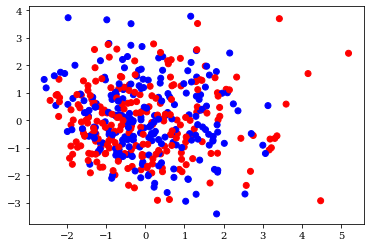

In [102]:
plt.scatter(trans_data1[0], trans_data1[2], c=high_om_label)

In [175]:
mapper, data, pred, label = vib_umap.return_umap(n_neighbors=100,min_dist=1, n_components=3, random_state=10,
                                                 ext_sim=True, which_data='train')
label = label[0]

In [38]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=3, kernel='linear')
_ = transformer.fit(high_om)
trans_data = transformer.transform(high_om_r)

In [ ]:
trans_data = transformer.transform(high_om_r)

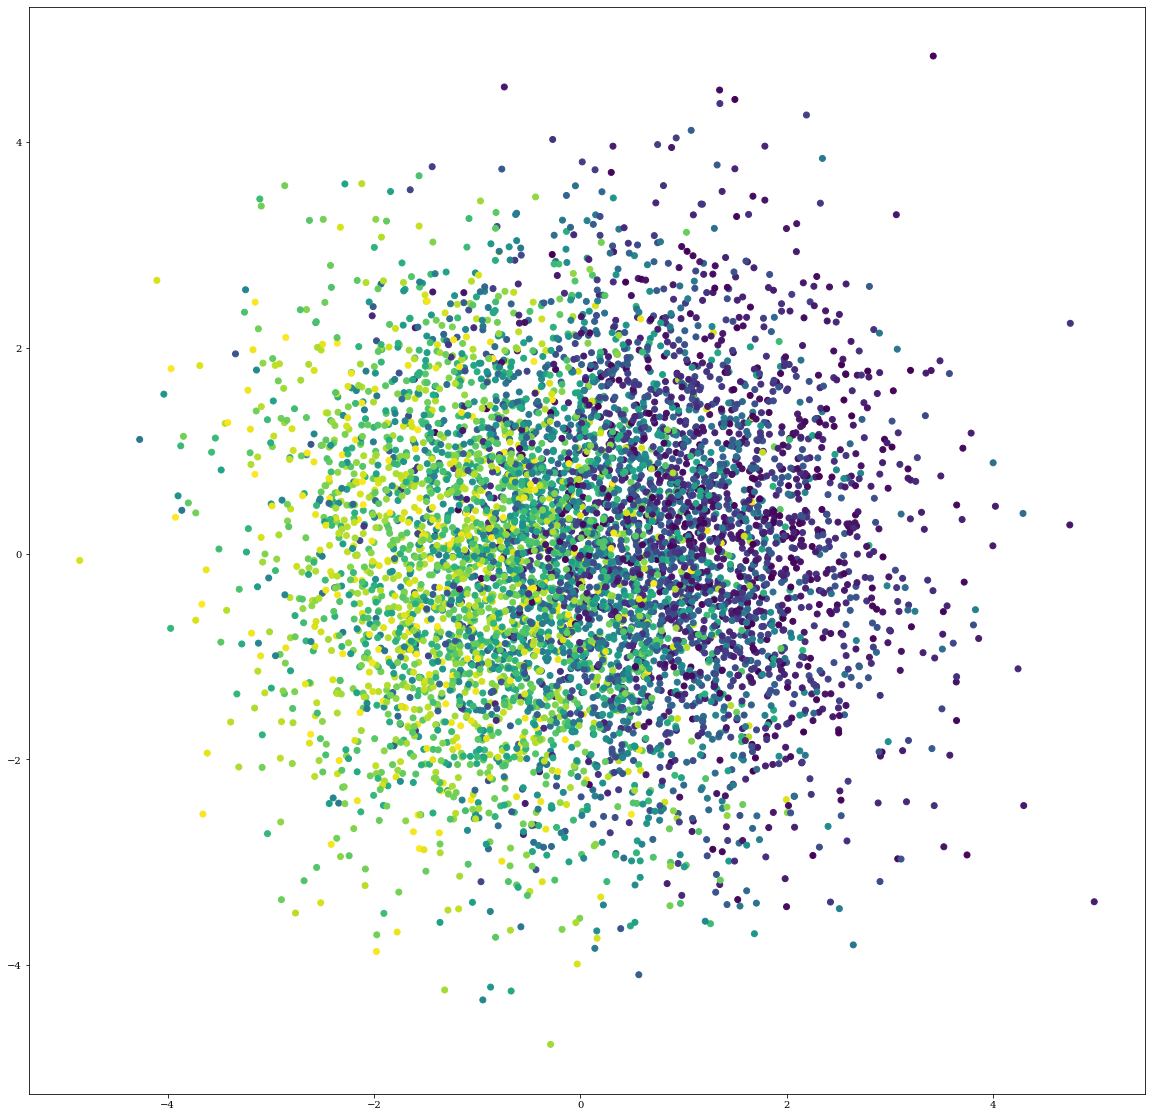

In [48]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,1], c=high_om_params[:,0])

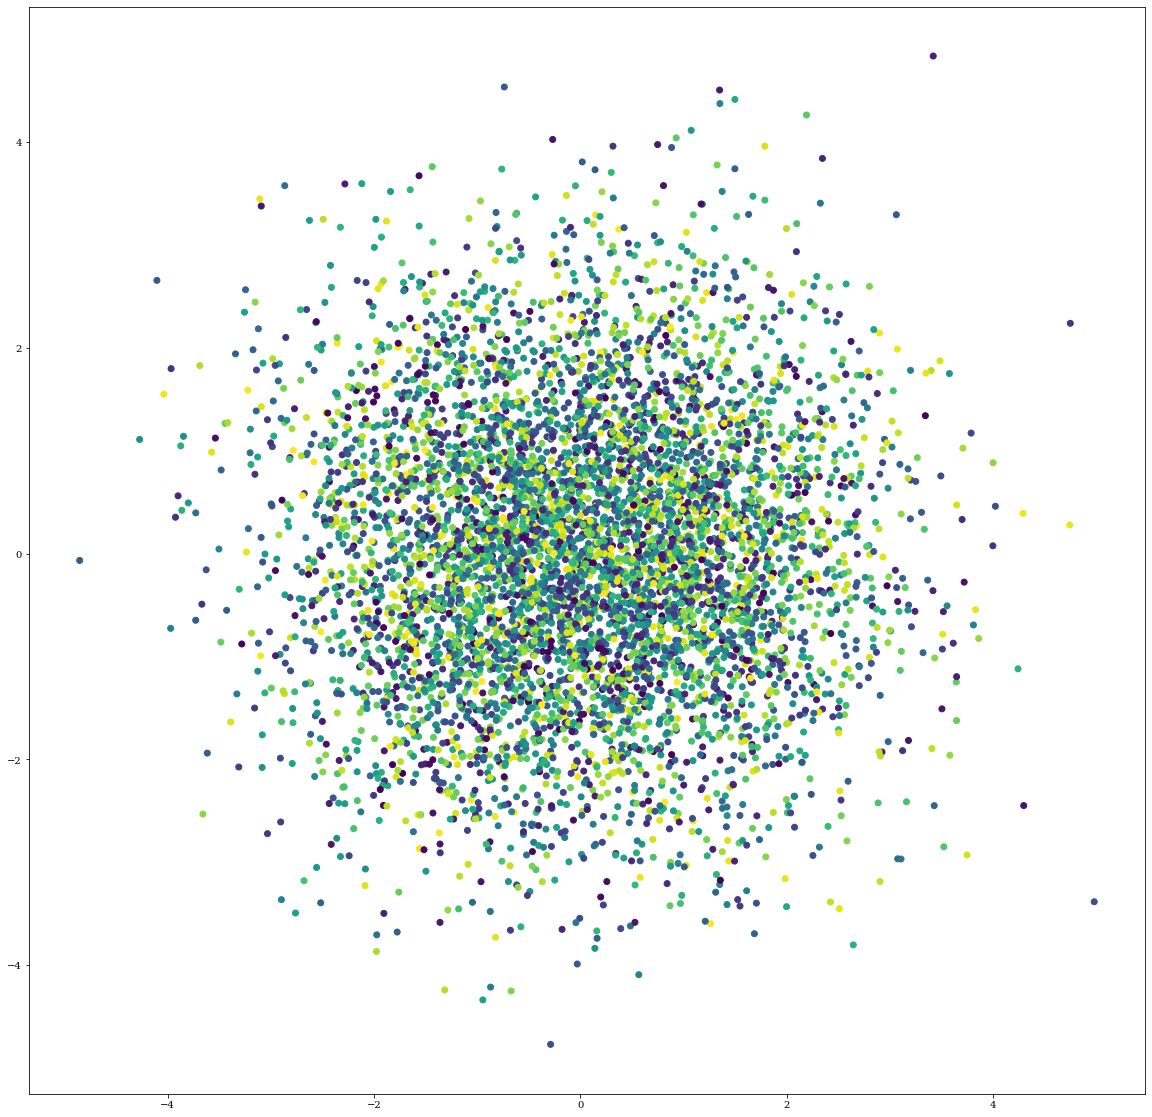

In [50]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,1], c=high_om_params[:,1])

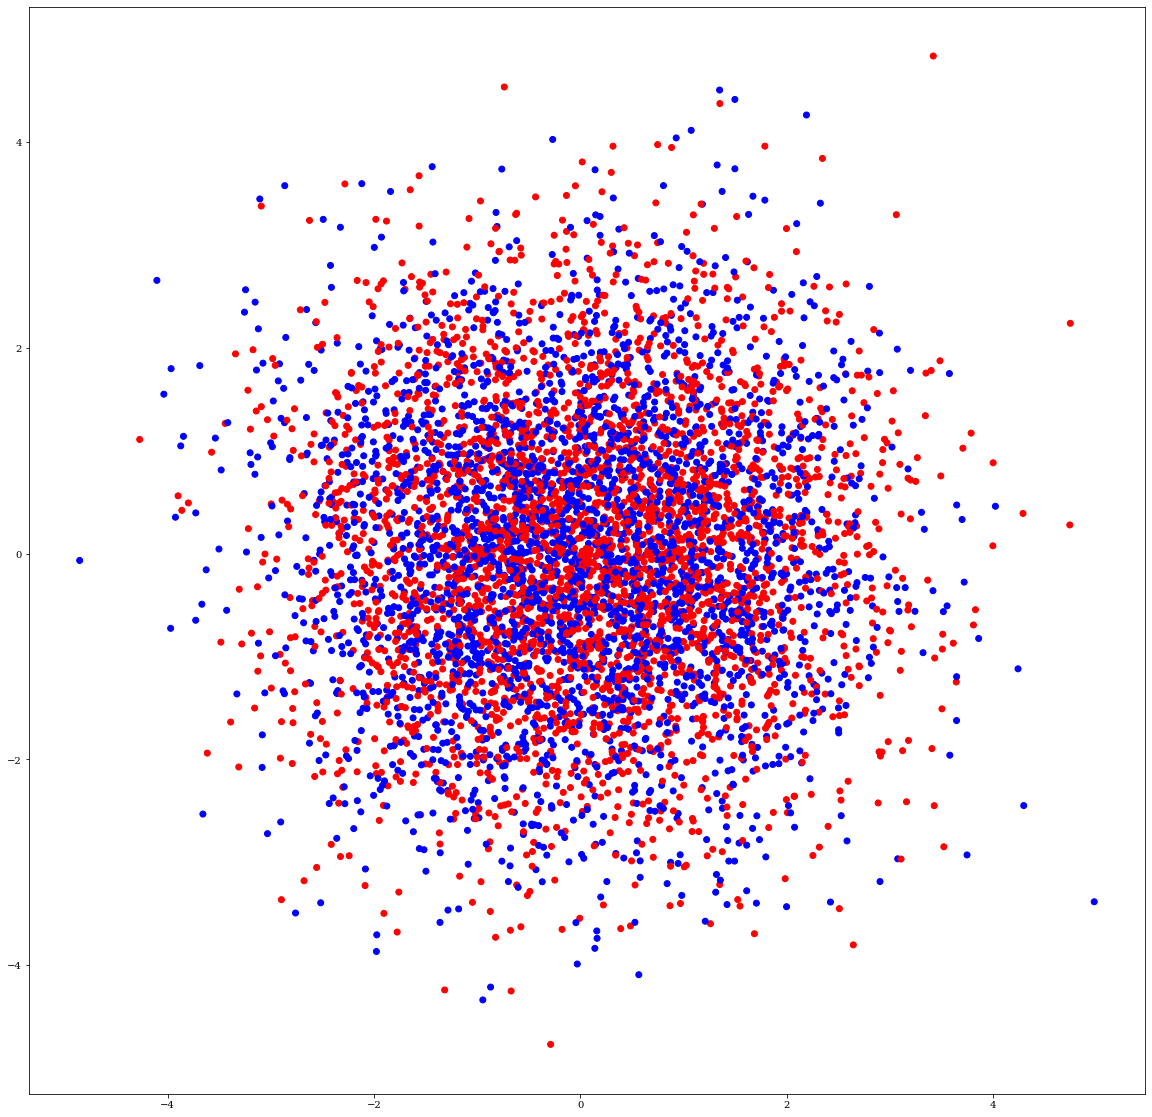

In [39]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,1], c=high_om_label)

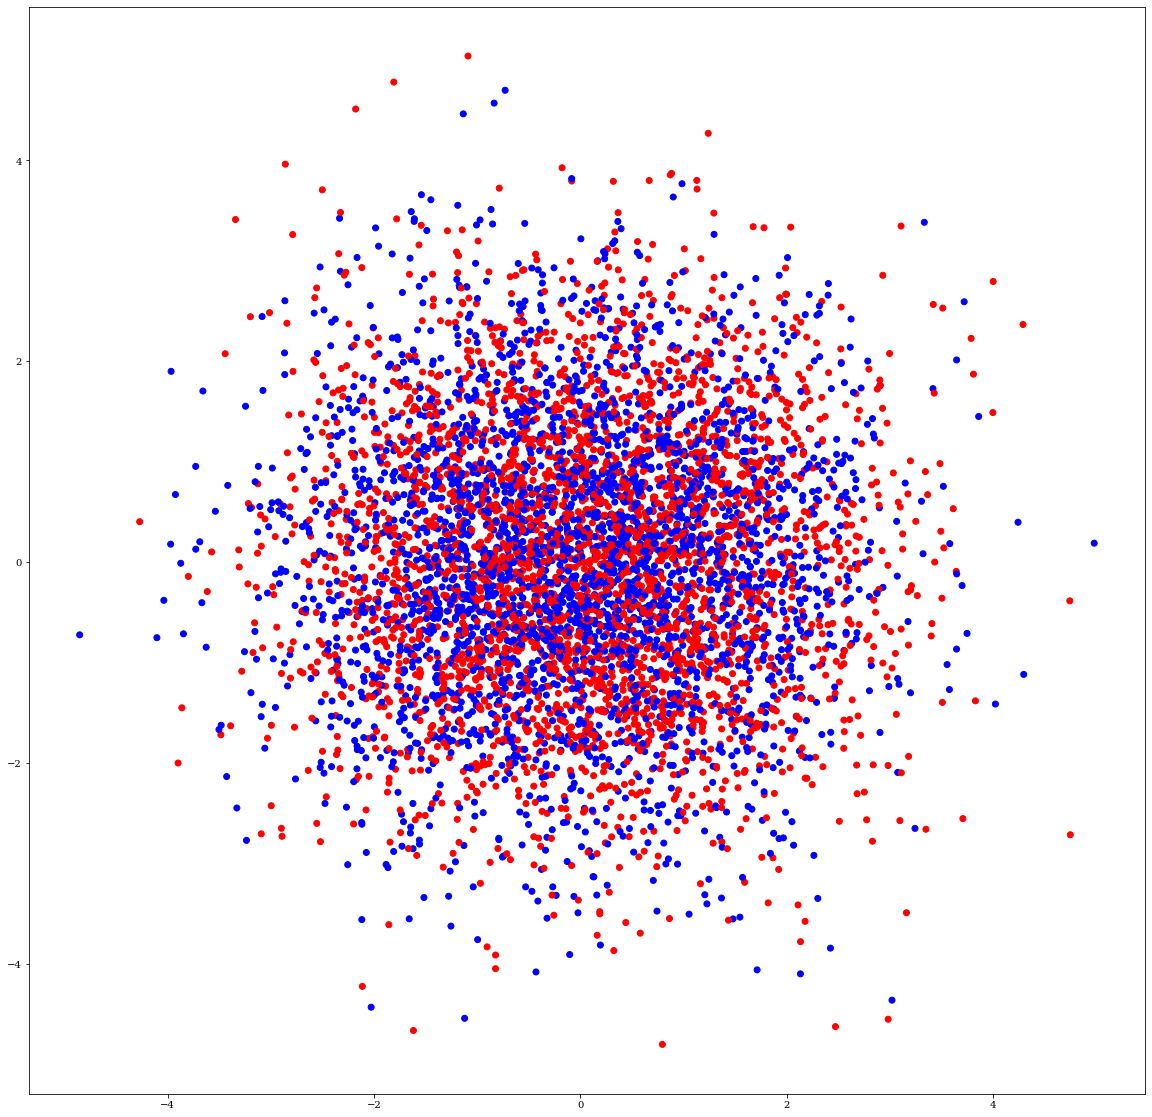

In [40]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,2], c=high_om_label)

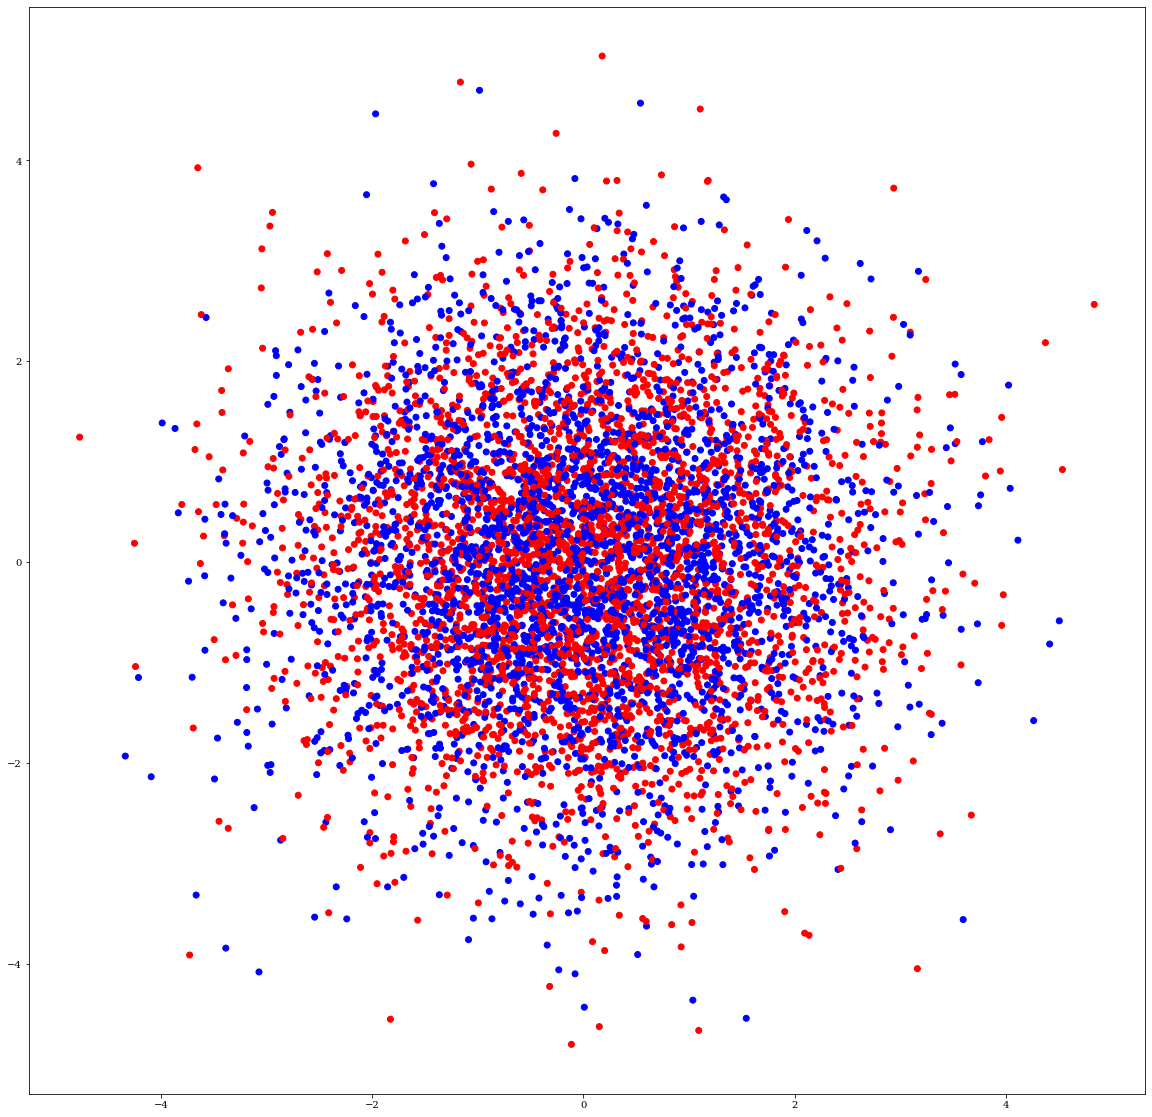

In [41]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,1], trans_data[:,2], c=high_om_label)

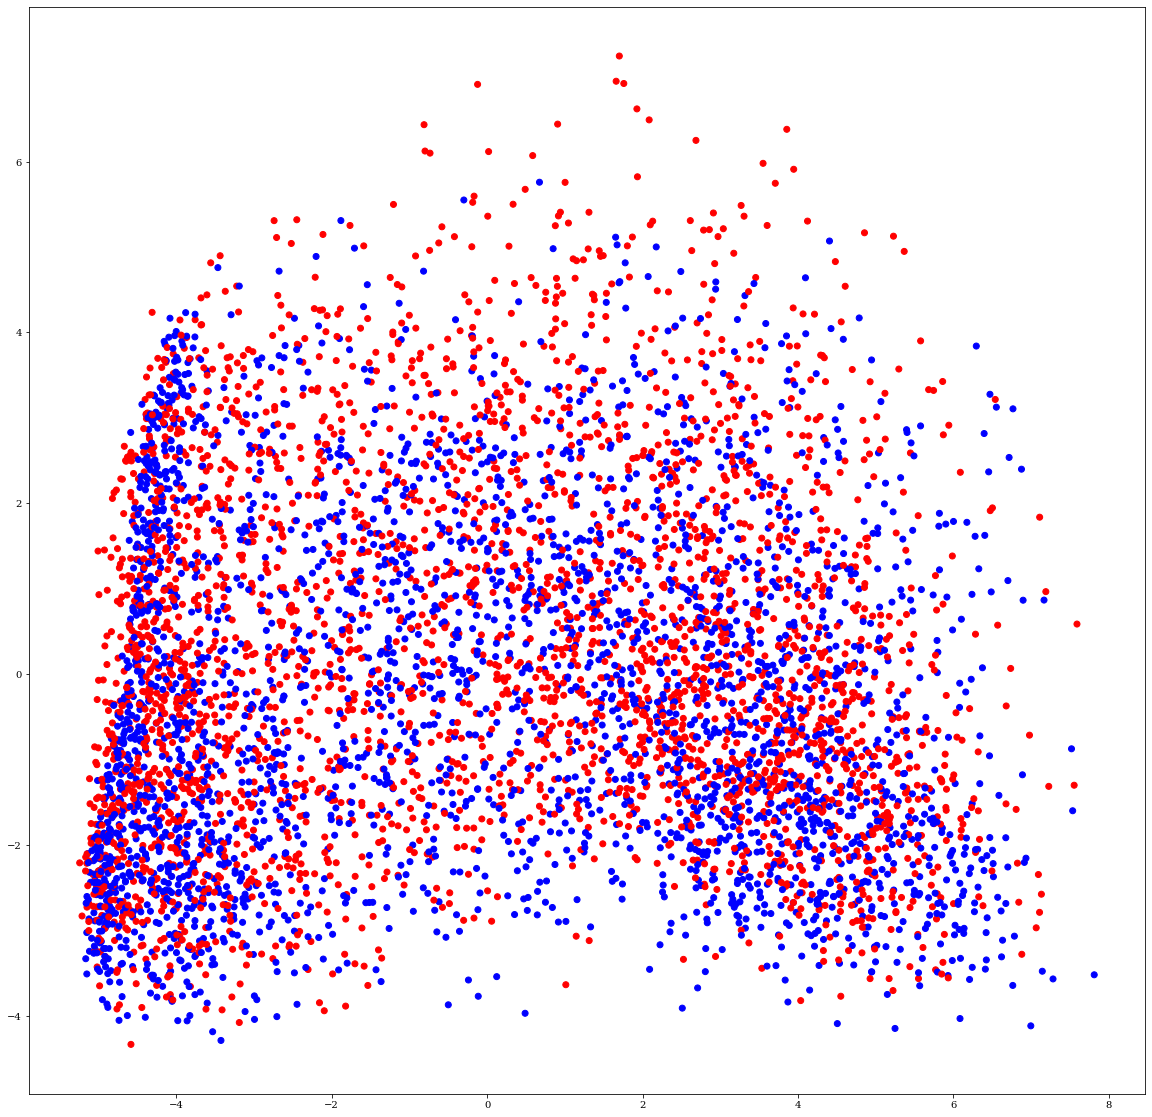

In [22]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,1], c=high_om_label)

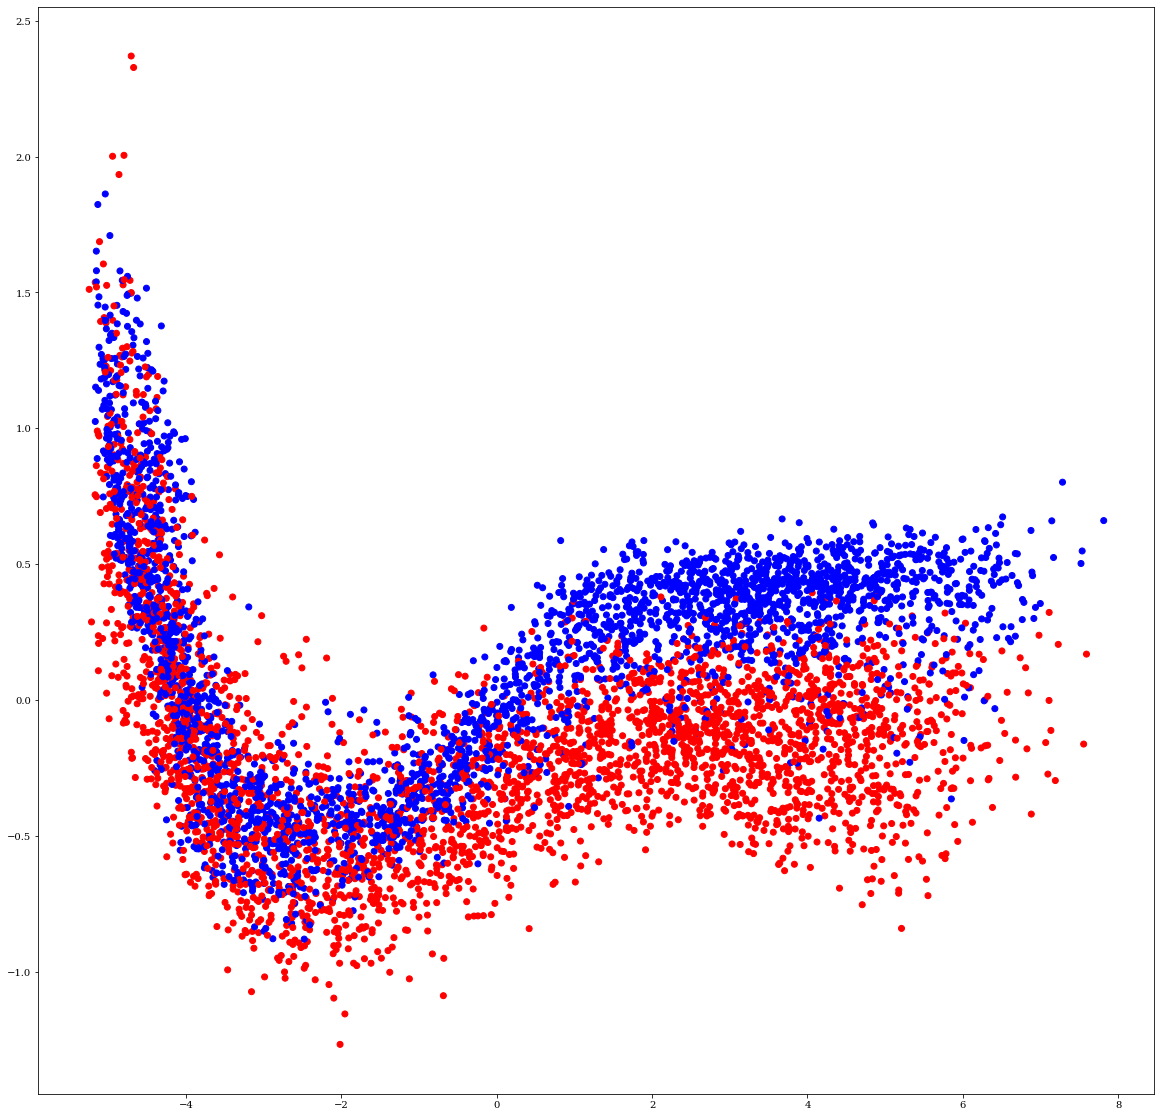

In [23]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,0], trans_data[:,2], c=high_om_label)

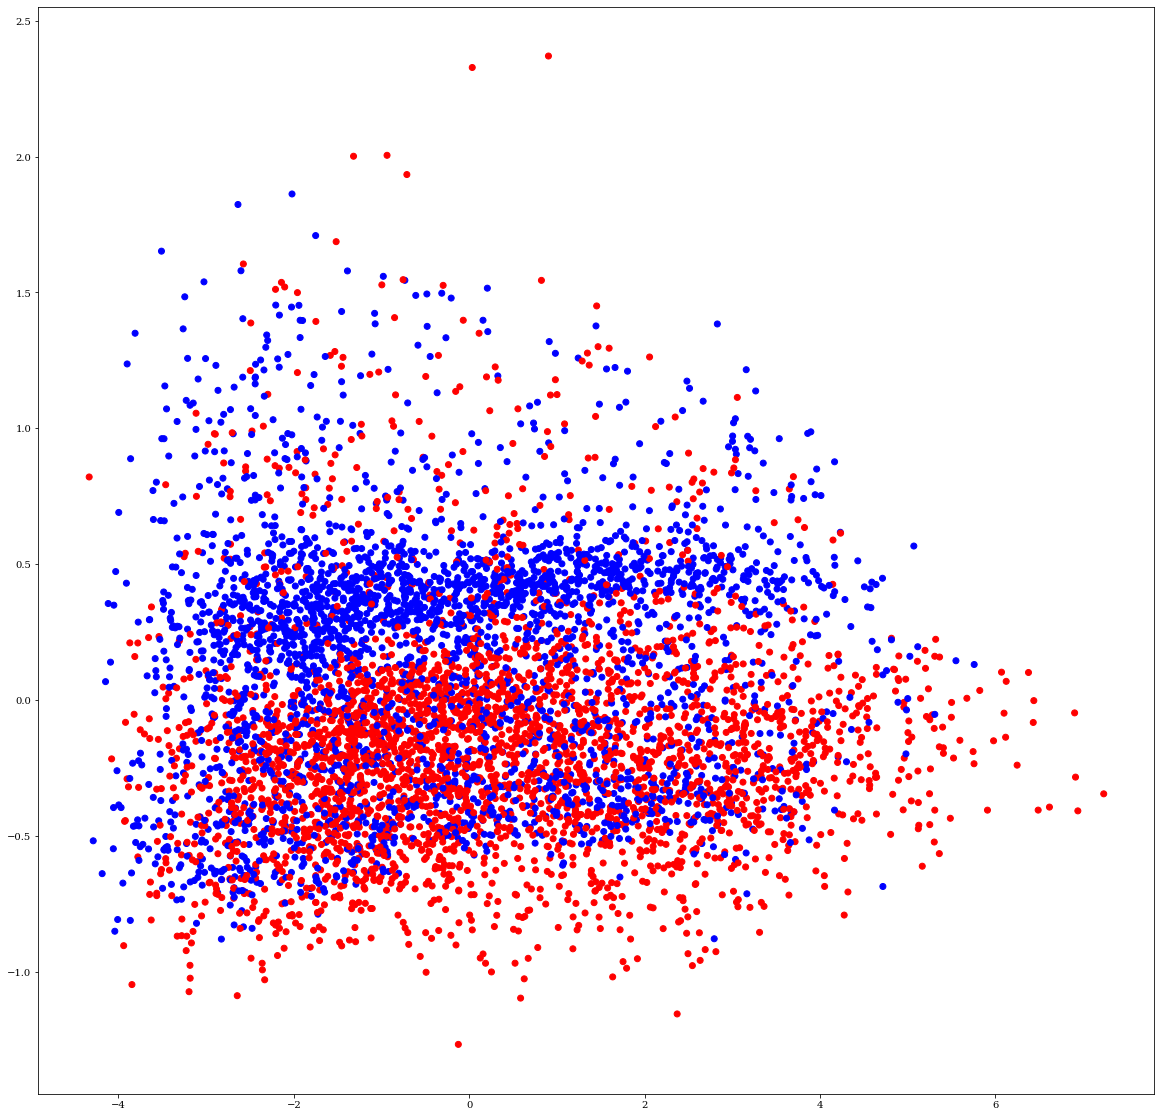

In [24]:
plt.figure(figsize=(20,20))
plt.scatter(trans_data[:,1], trans_data[:,2], c=high_om_label)